# Try to reproduce Graph 10

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds, differential_evolution

In [14]:
k_B = 1.38e-23  # Boltzmann constant in J/K
T = 298  # Temperature in Kelvin
sigma = 9.8  # Surface tension in dyne/cm converted to J/m²
a = 270e-9  # Droplet radius in meters
xi = 0.15  # Dimensionless parameter
epsilon_r = 78.5  # Relative permittivity of water
epsilon_0 = 8.85e-12  # Permittivity of vacuum in F/m
psi_0 = 270e-3  # Surface potential in volts
lambda_D = 3.4e-9  # Debye length in meters
phi_c = 0.646  # Critical volume fraction
alpha = 0.85  # Shear effect parameter
gamma = 0   # Initial shear strain

In [15]:
# Modify energy per droplet calculation functions to return values in units of k_B*T
def F_int(phi_d):
    return 4 * np.pi * xi * sigma * (a**2) * (phi_d**2) / (k_B * T)

def F_ent(phi, phi_d):
    return -3 * np.log(phi_c + phi_d - phi - alpha * gamma**2)

def F_elec(phi_d, phi):
    h = 2 * a * ((phi_c + phi_d) ** (1/3) * phi ** (-1/3) - 1)
    return 2 * np.pi * (a**2) * epsilon_r * epsilon_0 * psi_0**2 * np.exp(-h / lambda_D) / (h * k_B * T)

# Total free energy per droplet function in units of k_B*T
def F_tot(phi_d, phi):
    return F_int(phi_d) + F_ent(phi, phi_d) + F_elec(phi_d, phi)

In [16]:
def find_phi_d(phi):
    if phi <= phi_c:
        lower_bound = 0
    else:
        lower_bound = phi - phi_c
    bounds = [(lower_bound, phi_c)] 
    def F_tot_wrapper(phi_d):
        return  F_tot(phi_d[0], phi)
    result = differential_evolution(F_tot_wrapper, bounds=bounds)
    return result.x[0] if result.success else np.nan


# The relative percent graph

In [17]:
# Calculate values for plotting
phi_values = np.linspace(0.45, 0.85, 100)
phi_d_values = [find_phi_d(phi) for phi in phi_values]

phi_d_values[49:60]


C:\Users\Wei.Fan\AppData\Local\Temp\ipykernel_25732\2220882015.py:6: RuntimeWarning: divide by zero encountered in log
  return -3 * np.log(phi_c + phi_d - phi - alpha * gamma**2)
C:\Users\Wei.Fan\AppData\Local\Temp\ipykernel_25732\2220882015.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  return 2 * np.pi * (a**2) * epsilon_r * epsilon_0 * psi_0**2 * np.exp(-h / lambda_D) / (h * k_B * T)


[np.float64(0.025386257343851137),
 np.float64(0.028531534091840338),
 np.float64(0.03185822165373364),
 np.float64(0.03526012757992593),
 np.float64(0.03878976812301188),
 np.float64(0.042262154810037846),
 np.float64(0.04583298885743451),
 np.float64(0.049508905466445985),
 np.float64(0.05310033859275931),
 np.float64(0.056757997526529456),
 np.float64(0.06045693982003818)]

In [18]:
phi_values[49]

np.float64(0.647979797979798)

In [19]:
# Calculate each energy contribution in units of k_B*T
F_int_values = [F_int(phi_d) for phi_d in phi_d_values]
F_ent_values = [F_ent(phi, phi_d) for phi, phi_d in zip(phi_values, phi_d_values)]
F_elec_values = [F_elec(phi_d, phi) for phi_d, phi in zip(phi_d_values, phi_values)]
F_tot_values = [F_int + F_ent + F_elec for F_int, F_ent, F_elec in zip(F_int_values, F_ent_values, F_elec_values)]

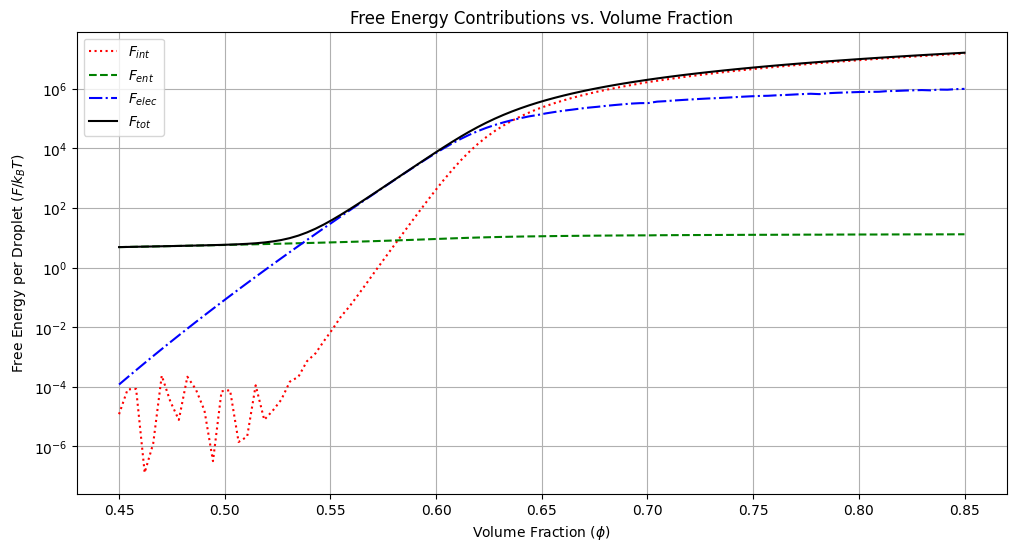

In [20]:
# Plotting the energies per droplet in units of k_B*T
plt.figure(figsize=(12, 6))
plt.plot(phi_values, F_int_values, label='$F_{int}$ ', linestyle='dotted', color='red')
plt.plot(phi_values, F_ent_values, label='$F_{ent}$ ', linestyle='dashed', color='green')
plt.plot(phi_values, F_elec_values, label='$F_{elec}$ ', linestyle='dashdot', color='blue')
plt.plot(phi_values, F_tot_values, label='$F_{tot}$ ', linestyle='solid', color='black')
plt.yscale('log')  # Log scale to match the figure from the paper
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel('Free Energy per Droplet ($F/k_B T$)')
plt.title('Free Energy Contributions vs. Volume Fraction')
plt.legend()
plt.grid(True)
plt.show()

# The relative percent graph 10-b

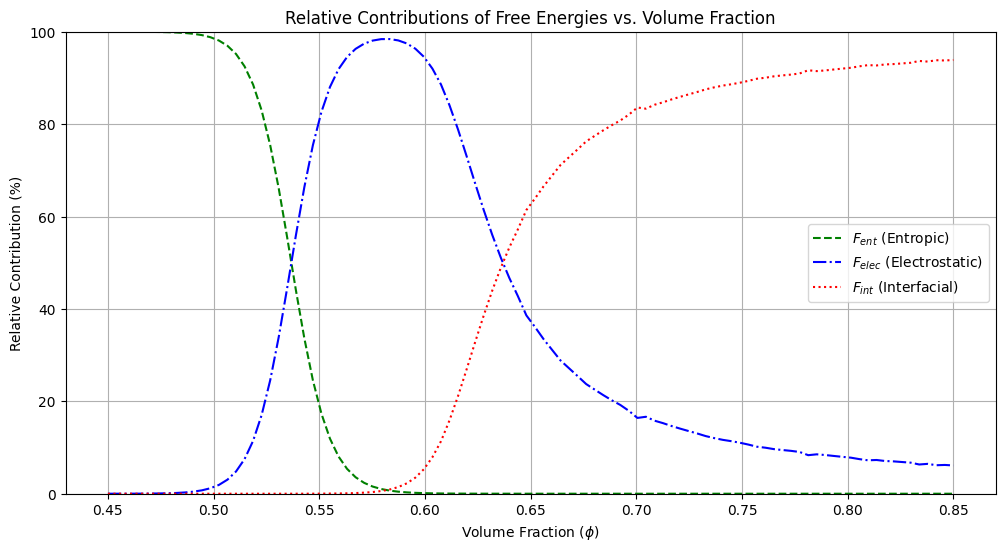

In [21]:
# Calculate the percentage contributions of each energy component to the total free energy
F_int_percent = [(F_int / F_tot) * 100 for F_int, F_tot in zip(F_int_values, F_tot_values)]
F_ent_percent = [(F_ent / F_tot) * 100 for F_ent, F_tot in zip(F_ent_values, F_tot_values)]
F_elec_percent = [(F_elec / F_tot) * 100 for F_elec, F_tot in zip(F_elec_values, F_tot_values)]

# Plotting the percent relative contributions as shown in Figure 10(b)
plt.figure(figsize=(12, 6))
plt.plot(phi_values, F_ent_percent, label='$F_{ent}$ (Entropic)', linestyle='dashed', color='green')
plt.plot(phi_values, F_elec_percent, label='$F_{elec}$ (Electrostatic)', linestyle='dashdot', color='blue')
plt.plot(phi_values, F_int_percent, label='$F_{int}$ (Interfacial)', linestyle='dotted', color='red')
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel('Relative Contribution (%)')
plt.title('Relative Contributions of Free Energies vs. Volume Fraction')
plt.ylim(0, 100)  # Limiting y-axis to 0-100% to match the style of Figure 10(b)
plt.grid(True)
plt.legend()
plt.show()


# Try to reproduce Graph 11-a

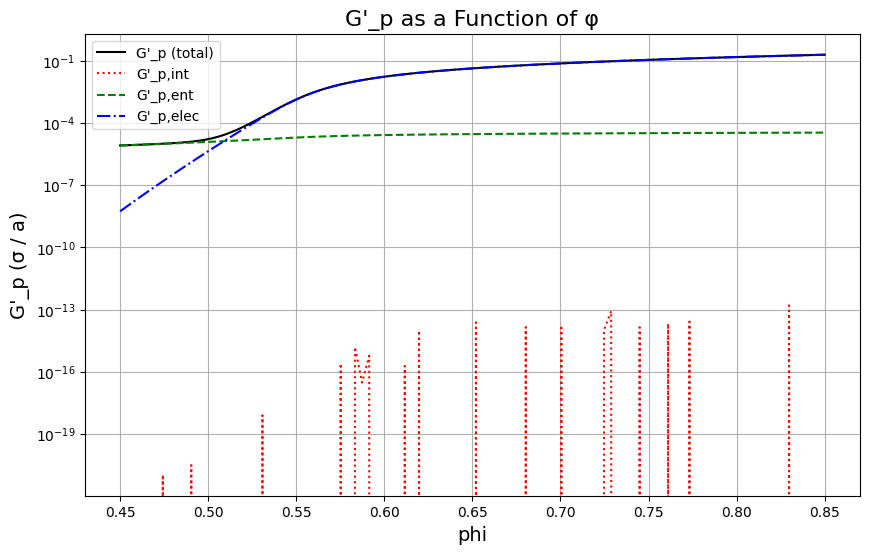

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# 定义常量
k_B = 1.38e-23  # Boltzmann constant in J/K
T = 298  # Temperature in Kelvin
sigma = 0.0098  # Surface tension in N/m (dyne/cm converted to J/m²)
a = 270e-9  # Droplet radius in meters
xi = 0.15  # Dimensionless parameter
epsilon_r = 78.5  # Relative permittivity of water
epsilon_0 = 8.85e-12  # Permittivity of vacuum in F/m
psi_0 = 270e-3  # Surface potential in volts
lambda_D = 3.4e-9  # Debye length in meters
phi_c = 0.646  # Critical volume fraction
alpha = 0.85  # Shear effect parameter
gamma_values = np.linspace(0, 0.01, 100)  # Gamma range

# 定义 F_int
def F_int(phi_d):
    return 4 * np.pi * xi * sigma * a**2 * phi_d**2

# 定义 F_ent
def F_ent(phi_d, phi, gamma):
    return -3 * k_B * T * np.log(phi_c + phi_d - phi - alpha * gamma**2)

# 定义 F_elec
def h(phi, phi_d, gamma):
    return 2 * phi_c**(1/3) * a * (phi**(-1/3) - (phi_c + phi_d - alpha * gamma**2)**(-1/3))

def F_elec(phi_d, phi, gamma):
    h_value = h(phi, phi_d, gamma)
    return 2 * np.pi * a**2 * epsilon_r * epsilon_0 * psi_0**2 * np.exp(-h_value / lambda_D) / h_value

# 通过最小化方法找到 phi_d_star
def find_phi_d_star(phi):
    if phi <= phi_c:
        lower_bound = 0
    else:
        lower_bound = phi - phi_c

    def F_tot_wrapper(phi_d):
        return F_int(phi_d) + F_ent(phi_d, phi, gamma=0) + F_elec(phi_d, phi, gamma=0)

    res = minimize_scalar(F_tot_wrapper, bounds=(lower_bound, phi_c), method='bounded')
    return res.x

# 使用最小二乘法拟合二阶导数
def curvature_of_F(func, phi_d, phi):
    F_values = [func(phi_d, phi, g) for g in gamma_values]
    p = np.polyfit(gamma_values, F_values, 2)  # 二次拟合
    return p[0]  # 返回二阶导数项

def curvature_of_F_int(phi_d):
    F_values = [F_int(phi_d) for g in gamma_values]
    p = np.polyfit(gamma_values, F_values, 2)  # 二次拟合
    return p[0]  # 返回二阶导数项

# 计算 G'_p,int
def G_p_int(phi, phi_d_star):
    curvature = curvature_of_F_int(phi_d_star)  # 拟合后的二阶导数
    V_drop = (4/3) * np.pi * a**3  # 液滴体积
    return (phi / (V_drop)) * curvature / (sigma / a)

# 计算 G'_p,ent
def G_p_ent(phi, phi_d_star):
    curvature = curvature_of_F(F_ent, phi_d_star, phi)
    V_drop = (4/3) * np.pi * a**3  # 液滴体积
    return (phi / (V_drop)) * curvature / (sigma / a)

# 计算 G'_p,elec
def G_p_elec(phi, phi_d_star):
    curvature = curvature_of_F(F_elec, phi_d_star, phi)
    V_drop = (4/3) * np.pi * a**3  # 液滴体积
    return (phi / (V_drop)) * curvature / (sigma / a)

# 计算所有 phi 对应的 phi_d_star
phi_values = np.linspace(0.45, 0.85, 100)
phi_d_star_values = [find_phi_d_star(phi) for phi in phi_values]

# 计算 G'_p,int, G'_p,ent 和 G'_p,elec
G_p_int_values = [G_p_int(phi, phi_d_star) for phi, phi_d_star in zip(phi_values, phi_d_star_values)]
G_p_ent_values = [G_p_ent(phi, phi_d_star) for phi, phi_d_star in zip(phi_values, phi_d_star_values)]
G_p_elec_values = [G_p_elec(phi, phi_d_star) for phi, phi_d_star in zip(phi_values, phi_d_star_values)]

# 计算总 G'_p
G_p_total_values = [G_p_ent + G_p_elec + G_p_int for G_p_ent, G_p_elec, G_p_int in zip(G_p_ent_values, G_p_elec_values, G_p_int_values)]

# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(phi_values, G_p_total_values, label="G'_p (total)", color='black', linestyle='-')
plt.plot(phi_values, G_p_int_values, label="G'_p,int", color='red', linestyle='dotted')
plt.plot(phi_values, G_p_ent_values, label="G'_p,ent", color='green', linestyle='dashed')
plt.plot(phi_values, G_p_elec_values, label="G'_p,elec", color='blue', linestyle='dashdot')

# 设置对数刻度
plt.yscale('log')
plt.xlabel('phi', fontsize=14)
plt.ylabel("G'_p (σ / a)", fontsize=14)
plt.title("G'_p as a Function of φ", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
